In [57]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame using the feature data
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add a column for the target labels
df['target'] = iris.target

# Replace target labels with target names
df['target_names'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

# Display the DataFrame
df.head(100)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,versicolor
96,5.7,2.9,4.2,1.3,1,versicolor
97,6.2,2.9,4.3,1.3,1,versicolor
98,5.1,2.5,3.0,1.1,1,versicolor


In [58]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
scaler = MinMaxScaler()

# Reshape and transform the 'Income($)' column
length_column = df[['sepal length (cm)']]  # Selecting as DataFrame
scaler.fit(length_column)
df['sepal length (cm)'] = scaler.transform(length_column)

# Reshape and transform the 'Age' column
width_column = df[['sepal width (cm)']]  # Selecting as DataFrame
scaler.fit(width_column)
df['sepal width (cm)'] = scaler.transform(width_column)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,0.222222,0.625000,1.4,0.2,0,setosa
1,0.166667,0.416667,1.4,0.2,0,setosa
2,0.111111,0.500000,1.3,0.2,0,setosa
3,0.083333,0.458333,1.5,0.2,0,setosa
4,0.194444,0.666667,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,0.666667,0.416667,5.2,2.3,2,virginica
146,0.555556,0.208333,5.0,1.9,2,virginica
147,0.611111,0.416667,5.2,2.0,2,virginica
148,0.527778,0.583333,5.4,2.3,2,virginica


Text(0, 0.5, 'Sepal Width')

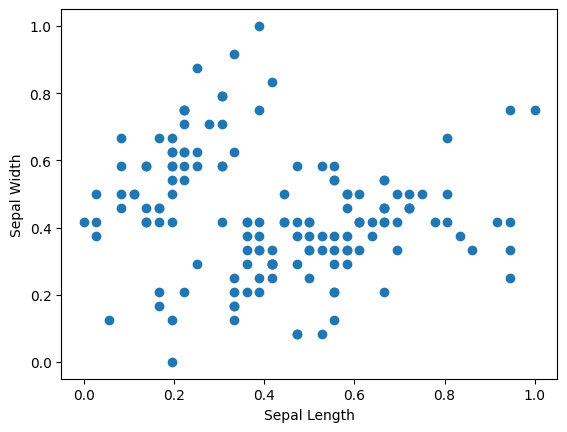

In [60]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [61]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

D:\Users\abgupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\abgupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\abgupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Users\abgupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

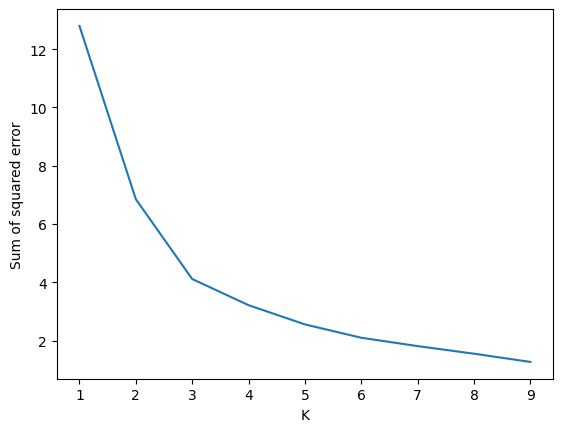

In [62]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [70]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
y_predicted


D:\Users\abgupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [71]:
df['Category']=y_predicted
km.cluster_centers_

array([[0.40483539, 0.28009259],
       [0.19897959, 0.60459184],
       [0.69562648, 0.45390071]])

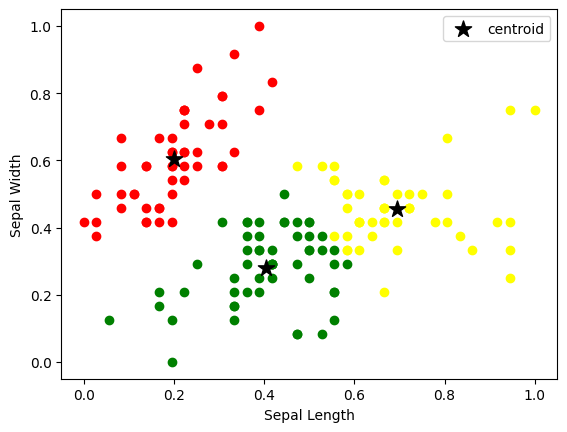

In [72]:
df1 = df[df.Category==0]
df2 = df[df.Category==1]
df3 = df[df.Category==2]

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',s=150,label='centroid')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

In [73]:
print(df.Category)

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: Category, Length: 150, dtype: int32


In [74]:
print(df.target)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [78]:
# Map the cluster assignments to actual class labels
cluster_labels = {0: 1, 1: 0, 2: 2}  # This assumes the dataset has 3 classes
mapped_predictions = [cluster_labels[pred] for pred in y_predicted]

In [79]:
accuracy = accuracy_score(iris.target, mapped_predictions)

In [80]:
accuracy

0.8

In [51]:
df['Category'] = df['Category'].replace({2: 'setosa', 0: 'versicolor',1:'virginica'})

In [52]:
df.head(100)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,Category
0,0.222222,0.625000,1.4,0.2,0,setosa,setosa
1,0.166667,0.416667,1.4,0.2,0,setosa,setosa
2,0.111111,0.500000,1.3,0.2,0,setosa,setosa
3,0.083333,0.458333,1.5,0.2,0,setosa,setosa
4,0.194444,0.666667,1.4,0.2,0,setosa,setosa
...,...,...,...,...,...,...,...
95,0.388889,0.416667,4.2,1.2,1,versicolor,versicolor
96,0.388889,0.375000,4.2,1.3,1,versicolor,versicolor
97,0.527778,0.375000,4.3,1.3,1,versicolor,versicolor
98,0.222222,0.208333,3.0,1.1,1,versicolor,versicolor


In [53]:
df.to_csv('Output.csv')

In [55]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with sepal length and sepal width
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [56]:
X = df[['sepal length (cm)', 'sepal width (cm)']]

# Fitting the KMeans model
k = 3  # Number of clusters (based on the Iris dataset classes)
km = KMeans(n_clusters=k)
y_predicted = km.fit_predict(X)

# Map the cluster assignments to actual class labels
cluster_labels = {0: 0, 1: 1, 2: 2}  # This assumes the dataset has 3 classes
mapped_predictions = [cluster_labels[pred] for pred in y_predicted]

# Calculate accuracy (only for demonstration purposes, clustering doesn't have "accuracy" like classification)
accuracy = accuracy_score(iris.target, mapped_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.5133333333333333


D:\Users\abgupta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
